# Downloading Dataset

In [6]:
import os

# Create the .kaggle directory if it doesn't exist
if not os.path.exists('/root/.kaggle'):
    os.makedirs('/root/.kaggle')

# Move kaggle.json to the .kaggle directory
# Make sure you have uploaded kaggle.json to your Colab session storage first
!mv kaggle.json /root/.kaggle/

# Set permissions for the kaggle.json file
!chmod 600 /root/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory


In [7]:
!kaggle datasets download -d samuelcortinhas/cats-and-dogs-image-classification
!unzip cats-and-dogs-image-classification.zip

Dataset URL: https://www.kaggle.com/datasets/samuelcortinhas/cats-and-dogs-image-classification
License(s): CC0-1.0
  0% 0.00/64.4M [00:00<?, ?B/s]
100% 64.4M/64.4M [00:00<00:00, 1.60GB/s]
Archive:  cats-and-dogs-image-classification.zip
  inflating: test/cats/cat_1.jpg     
  inflating: test/cats/cat_106.jpg   
  inflating: test/cats/cat_109.jpg   
  inflating: test/cats/cat_113.jpg   
  inflating: test/cats/cat_114.jpg   
  inflating: test/cats/cat_116.jpg   
  inflating: test/cats/cat_118.jpg   
  inflating: test/cats/cat_119.jpg   
  inflating: test/cats/cat_124.jpg   
  inflating: test/cats/cat_140.jpg   
  inflating: test/cats/cat_147.jpg   
  inflating: test/cats/cat_156.jpg   
  inflating: test/cats/cat_158.jpg   
  inflating: test/cats/cat_162.jpg   
  inflating: test/cats/cat_18.jpg    
  inflating: test/cats/cat_190.jpg   
  inflating: test/cats/cat_203.jpg   
  inflating: test/cats/cat_223.jpg   
  inflating: test/cats/cat_234.jpg   
  inflating: test/cats/cat_244.jpg   
  

# Importing Libraries

In [31]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping

# Spliting data into train and test

In [10]:
# image dataset is big and its difficult to load it on RAM and train the model
# Solution :- Generators

# Generators :- Load images in the RAM batch wise and train it batch wise.

train_data = keras.utils.image_dataset_from_directory(
    directory = "/content/train",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256,256)
)

test_data = keras.utils.image_dataset_from_directory(
    directory = "/content/test",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256,256)
)

Found 557 files belonging to 2 classes.
Found 140 files belonging to 2 classes.


# Normalization

In [12]:
def normalize(img, label):
  img = tf.cast(img/255.0, tf.float32)
  return img, label

train_data = train_data.map(normalize)
test_data = test_data.map(normalize)

# Building a modal

In [33]:
model = Sequential([
    Input(shape = (256, 256, 3)),
    Conv2D(32, kernel_size=(3,3), activation='relu', padding='valid'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),

    Conv2D(64, kernel_size=(3,3), activation='relu', padding='valid'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),

    Conv2D(128, kernel_size=(3,3), activation='relu', padding='valid'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(54, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

In [34]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 54)             │         6,966 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 54)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            55 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,846,893 (56.64 MB)

 Trainable params: 14,846,445 (56.63 MB)

 Non-trainable params: 448 (1.75 KB)

In [35]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall(),
    ]
)

In [36]:
callbacks = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True,
    mode='min',
    min_delta=0.0001,
    baseline=None,
    start_from_epoch=0,
)

In [37]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=test_data,
    callbacks=callbacks
)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 390ms/step - accuracy: 0.4889 - loss: 4.4576 - precision_1: 0.5013 - recall_1: 0.6106 - val_accuracy: 0.5000 - val_loss: 6.0271 - val_precision_1: 0.5000 - val_recall_1: 1.0000
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 203ms/step - accuracy: 0.6532 - loss: 2.3646 - precision_1: 0.6323 - recall_1: 0.6474 - val_accuracy: 0.5000 - val_loss: 8.9809 - val_precision_1: 0.5000 - val_recall_1: 1.0000
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.6802 - loss: 1.7266 - precision_1: 0.6890 - recall_1: 0.6463 - val_accuracy: 0.5000 - val_loss: 10.5159 - val_precision_1: 0.5000 - val_recall_1: 1.0000
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.7305 - loss: 1.6271 - precision_1: 0.7030 - recall_1: 0.7815 - val_accuracy: 0.5429 - val_loss: 1.5290 - val_precision_1: 0.5455 - val_recall_1: 0.5143
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - accuracy: 0.7844 - loss: 1.1659 - precision_1: 0.7997 - recall_1: 0.7666

# Plotting accuracy and validation accuracy



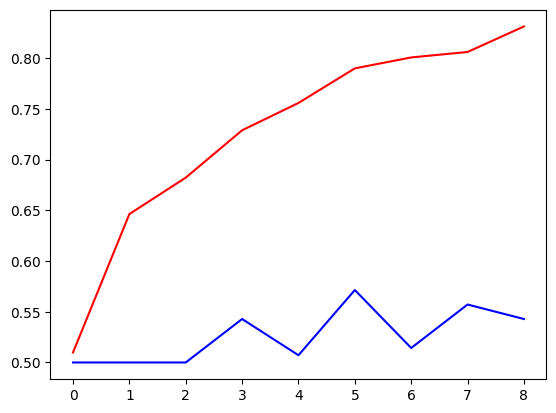

In [39]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'], c='r')
plt.plot(history.history['val_accuracy'], c='b')
plt.show()

# Plotting Loss and validation loss

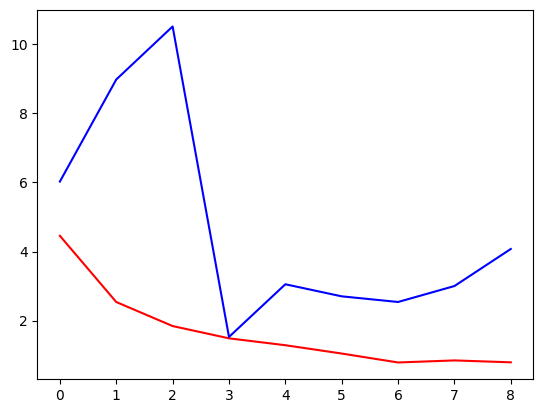

In [40]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], c='r')
plt.plot(history.history['val_loss'], c='b')
plt.show()

# Prediction

In [42]:
import numpy as np

y_true = []
y_pred = []

for images, labels in test_data:
    preds = model.predict(images, verbose=0)
    preds = (preds > 0.5).astype(int)   # threshold = 0.5

    y_true.extend(labels.numpy())
    y_pred.extend(preds.flatten())

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Evaluation Metrics

In [41]:
test_loss, test_acc, test_precision, test_recall = model.evaluate(test_data)

print(f"Test Loss      : {test_loss:.4f}")
print(f"Test Accuracy  : {test_acc:.4f}")
print(f"Test Precision : {test_precision:.4f}")
print(f"Test Recall    : {test_recall:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - accuracy: 0.5455 - loss: 1.5671 - precision_1: 0.4935 - recall_1: 0.5006
Test Loss      : 1.5290
Test Accuracy  : 0.5429
Test Precision : 0.5455
Test Recall    : 0.5143


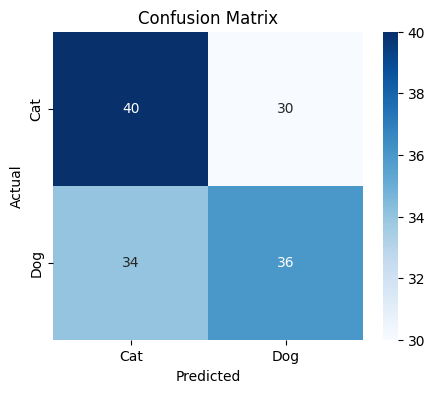

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Cat', 'Dog'],
            yticklabels=['Cat', 'Dog'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [44]:
from sklearn.metrics import classification_report

print(classification_report(
    y_true,
    y_pred,
    target_names=['Cat', 'Dog']
))

              precision    recall  f1-score   support

         Cat       0.54      0.57      0.56        70
         Dog       0.55      0.51      0.53        70

    accuracy                           0.54       140
   macro avg       0.54      0.54      0.54       140
weighted avg       0.54      0.54      0.54       140



In [45]:
from sklearn.metrics import f1_score

f1 = f1_score(y_true, y_pred)
print("F1 Score:", f1)

F1 Score: 0.5294117647058824
